In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt



In [2]:
def read_file(filename):
  img=cv2.imread(filename)
  img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.imshow(img)
  plt.show()
  return img

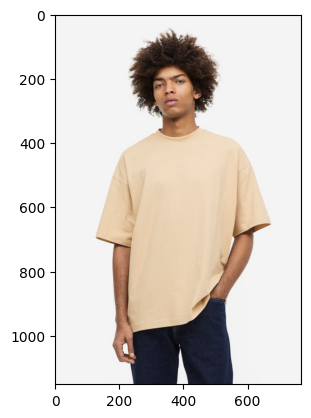

In [3]:
filename="image.jpeg"
img=read_file(filename)

org_img=np.copy(img)

In [4]:
def edge_mask(img, line_size, blur_value):
  gray=cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  gray_blur=cv2.medianBlur(gray, blur_value)

  edges=cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, line_size, blur_value)

  return edges


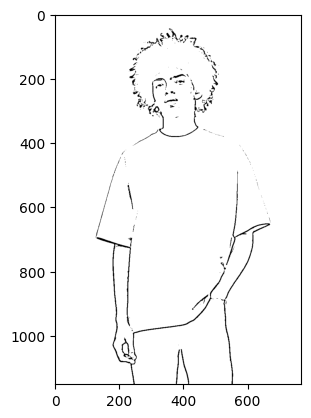

In [5]:
line_size, blur_value=7,7
edges=edge_mask(img, line_size, blur_value)

plt.imshow(edges, cmap="gray")
plt.show()





Reduce the color palette

In [6]:
def color_quantization(img, k):
  #transform the image
  data=np.float32(img).reshape((-1,3))

  #determine criteria
  criteria=(cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001)

  #implementing k-mean clustering

  ret, label, center= cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
  center=np.uint8(center)

  result=center[label.flatten()]
  result=result.reshape(img.shape)
  return result

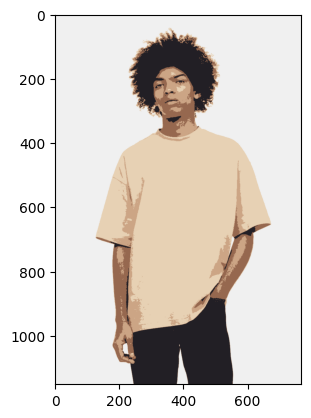

In [8]:
img=color_quantization(img, k=6)

plt.imshow(img)
plt.show()

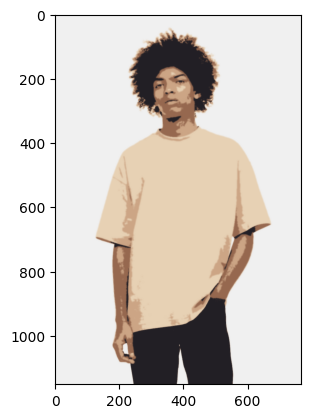

In [9]:
#reduce the noise

blurred=cv2.bilateralFilter(img, d=7, sigmaColor=200, sigmaSpace=200)
plt.imshow(blurred)
plt.show()

combine edge mask and quantize img


In [10]:
def cartoon():
  c=cv2.bitwise_and(blurred, blurred, mask=edges)
  plt.imshow(c)
  plt.title("cartoonified image")
  plt.show()

  plt.imshow(org_img)
  plt.title("original image")
  plt.show()

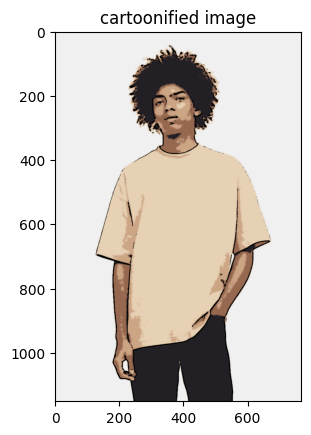

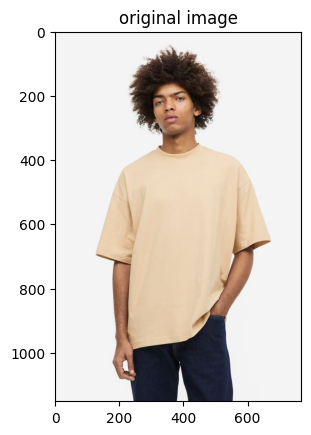

In [11]:
cartoon()